# Import necessary libraries

In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# File handling

In [81]:
df_test = pd.read_csv("C://Users//KRISHNA KANTH//Desktop//abex project//dataset (1)//test.csv")

In [82]:
df_test.head()

,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_004135,Bullock Group,Retail,3.265246,2425223.28,2021-08-20,7.201083,5.569041,Operations,8.0,8.4,3566.504824,1280,16976562.96,0
1,COMP_011804,"Morris, Tyler and Scott",SaaS,1.912502,3988620.41,2020-05-28,14.562457,46.348625,Engineering,7.1,4.3,890.317056,1729,55840685.74,1
2,COMP_021637,Lara-Williams,Tech,5.425373,2645234.46,2021-03-04,14.797940,34.121940,Marketing,16.0,14.8,669.679610,1449,37033282.44,0
3,COMP_018533,Frost-Hernandez,Retail,0.987882,3194492.15,2022-10-25,14.946632,4.969312,Sales,21.1,5.9,5414.393475,849,41528397.95,0
4,COMP_014125,Williams-Bean,Retail,3.583654,884497.73,2020-11-01,9.714369,-7.111839,Operations,8.1,-4.3,-1499.148695,1572,9729475.03,0


In [83]:
df_test.shape

(5000, 15)

In [84]:
df_test.columns.to_list()

['company_id',
 'company_name',
 'industry',
 'funding_rounds',
 'total_funding',
 'last_funding_date',
 'job_postings_30d',
 'employee_growth_pct',
 'hiring_roles',
 'industry_growth_rate',
 'regional_employment_trend',
 'funding_per_employee',
 'days_since_last_funding',
 'growth_momentum',
 'is_hot_lead']

In [85]:
df_train= pd.read_csv("C://Users//KRISHNA KANTH//Desktop//abex project//dataset (1)//train.csv")

In [86]:
df_train.head()

,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_024008,Moreno and Sons,Retail,1.911533,3795597.04,2021-07-14,10.995177,-8.355216,Operations,11.5,-0.2,-5930.620375,1317,45547164.48,0
1,COMP_007976,"Morales, Hubbard and Mcdonald",Healthcare,3.221005,5792195.29,2020-05-23,5.052385,20.602718,Marketing,23.9,10.5,2106.252833,1734,34753171.74,0
2,COMP_021959,Strickland-Wright,Tech,3.975966,191991.00,2020-05-07,5.008945,0.456013,Operations,20.5,-1.5,1371.364286,1750,959955.00,0
3,COMP_012658,Sanders Group,Fintech,2.842382,890042.57,2023-04-11,9.882709,1.202142,Operations,23.2,13.9,4238.297952,681,8010383.13,0
4,COMP_011887,Davis Inc,Retail,2.264359,3369725.77,2024-03-27,11.461475,22.633126,Marketing,9.0,8.6,1567.314312,330,40436709.24,1


In [87]:
df_train.shape

(20000, 15)

# Exploratory Data Analysis (EDA)

In [88]:
df_train.columns.to_list()

['company_id',
 'company_name',
 'industry',
 'funding_rounds',
 'total_funding',
 'last_funding_date',
 'job_postings_30d',
 'employee_growth_pct',
 'hiring_roles',
 'industry_growth_rate',
 'regional_employment_trend',
 'funding_per_employee',
 'days_since_last_funding',
 'growth_momentum',
 'is_hot_lead']

In [89]:
df_train.columns.to_list()

['company_id',
 'company_name',
 'industry',
 'funding_rounds',
 'total_funding',
 'last_funding_date',
 'job_postings_30d',
 'employee_growth_pct',
 'hiring_roles',
 'industry_growth_rate',
 'regional_employment_trend',
 'funding_per_employee',
 'days_since_last_funding',
 'growth_momentum',
 'is_hot_lead']

In [90]:
# Check for missing values
print("Missing values in each column:")
df_train.isnull().sum()

Missing values in each column:


company_id                   0
company_name                 0
industry                     0
funding_rounds               0
total_funding                0
last_funding_date            0
job_postings_30d             0
employee_growth_pct          0
hiring_roles                 0
industry_growth_rate         0
regional_employment_trend    0
funding_per_employee         0
days_since_last_funding      0
growth_momentum              0
is_hot_lead                  0
dtype: int64

In [91]:
df_train.describe()

,funding_rounds,total_funding,job_postings_30d,employee_growth_pct,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000
mean,2.987775,4.171424e+06,10.002013,19.954379,17.456325,5.133810,inf,909.826000,4.188535e+07,0.149250
std,1.454144,3.088695e+06,3.328233,17.532040,7.232038,5.767425,NaN,527.341786,3.525597e+07,0.356344
min,0.686082,1.004476e+05,0.926065,-12.491863,5.000000,-5.000000,-7.894026e+05,1.000000,2.957271e+05,0.000000
25%,1.954142,1.719901e+06,7.640501,4.824062,11.200000,0.200000,3.183275e+02,455.000000,1.532106e+07,0.000000
50%,2.869536,3.533375e+06,9.733120,19.865427,17.400000,5.200000,1.181334e+03,905.000000,3.279494e+07,0.000000
75%,3.868760,5.976700e+06,12.056417,34.704816,23.700000,10.200000,2.786092e+03,1363.000000,5.888261e+07,0.000000
max,13.013271,2.141484e+07,29.457835,64.173316,30.000000,15.000000,inf,1827.000000,3.239826e+08,1.000000


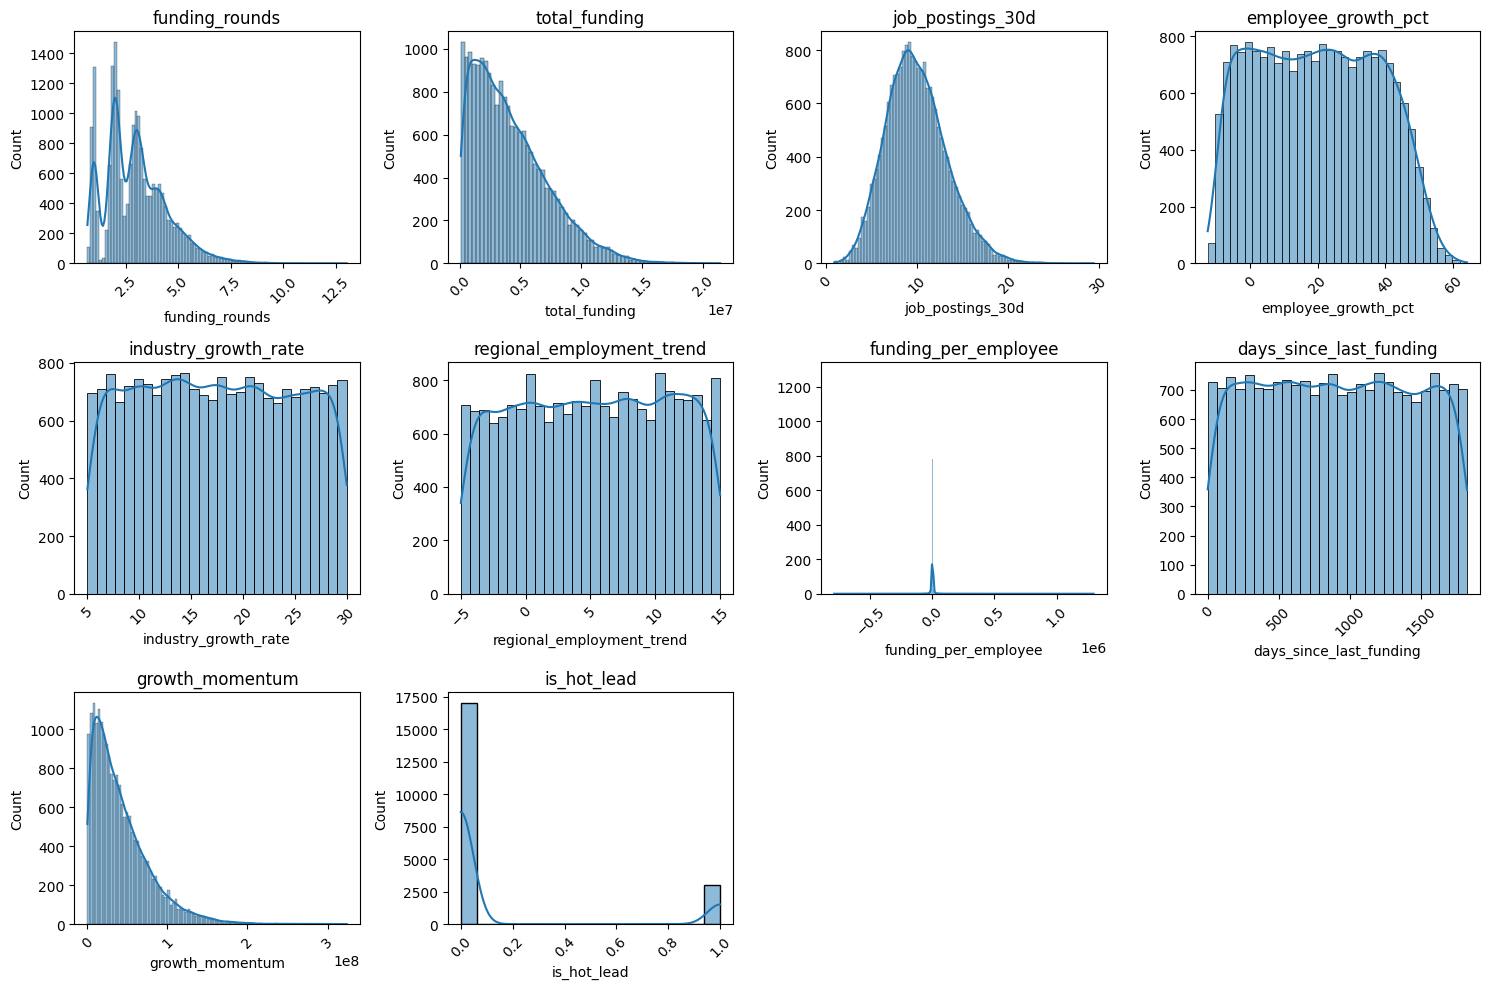

In [92]:
# Convert last_funding_date to datetime
df_train['last_funding_date'] = pd.to_datetime(df_train['last_funding_date'])
# Create a figure for numerical features distribution
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
df_train['total_funding'] = np.sqrt(df_train['total_funding'])  # Square root
df_train['growth_momentum'] = np.cbrt(df_train['growth_momentum'])  # Cube root

convert skewed to Normal distibution

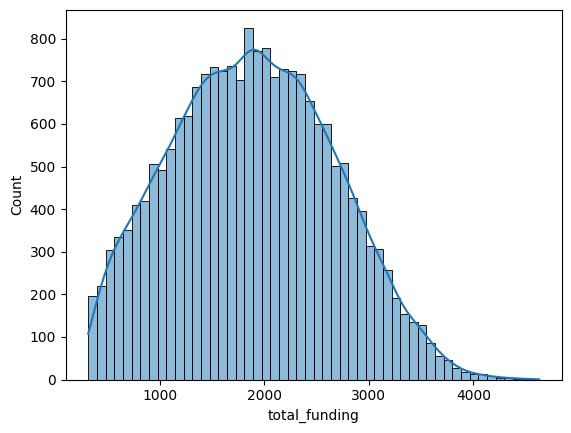

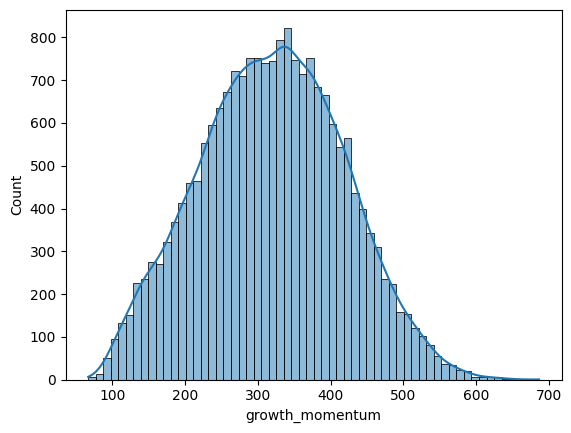

In [94]:
sns.histplot(df_train['total_funding'], kde=True)
plt.show()
sns.histplot(df_train['growth_momentum'], kde=True)
plt.show()

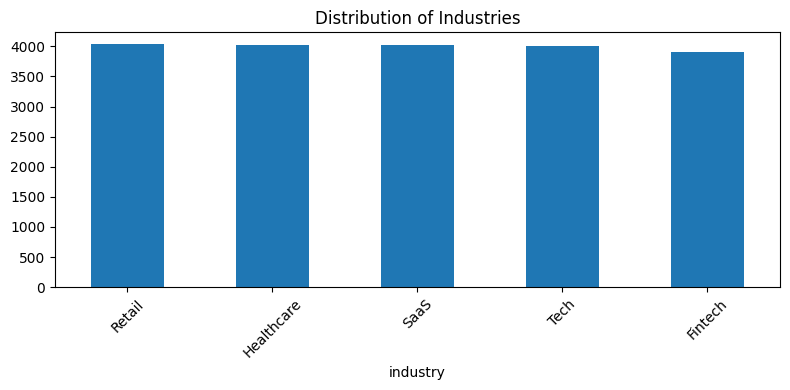

In [95]:
# Show industry distribution
plt.figure(figsize=(8, 4))
df_train['industry'].value_counts().plot(kind='bar')
plt.title('Distribution of Industries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

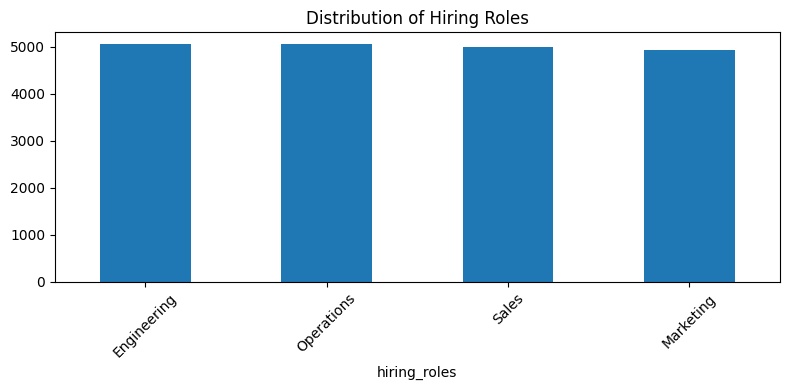

In [96]:
# Show hiring roles distribution
plt.figure(figsize=(8, 4))
df_train['hiring_roles'].value_counts().plot(kind='bar')
plt.title('Distribution of Hiring Roles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering & Transformation

# Data Cleaning:

In [97]:
df_train.describe()

,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
count,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,2.987775,1890.575283,2022-08-25 04:10:33.600000,10.002013,19.954379,17.456325,5.133810,inf,909.826000,319.122788,0.149250
min,0.686082,316.934662,2020-02-20 00:00:00,0.926065,-12.491863,5.000000,-5.000000,-7.894026e+05,1.000000,66.623950,0.000000
25%,1.954142,1311.449970,2021-05-29 00:00:00,7.640501,4.824062,11.200000,0.200000,3.183275e+02,455.000000,248.368344,0.000000
50%,2.869536,1879.727430,2022-08-30 00:00:00,9.733120,19.865427,17.400000,5.200000,1.181334e+03,905.000000,320.087659,0.000000
75%,3.868760,2444.729049,2023-11-23 00:00:00,12.056417,34.704816,23.700000,10.200000,2.786092e+03,1363.000000,389.041280,0.000000
max,13.013271,4627.617383,2025-02-19 00:00:00,29.457835,64.173316,30.000000,15.000000,inf,1827.000000,686.816232,1.000000
std,1.454144,772.773322,NaN,3.328233,17.532040,7.232038,5.767425,NaN,527.341786,98.792227,0.356344


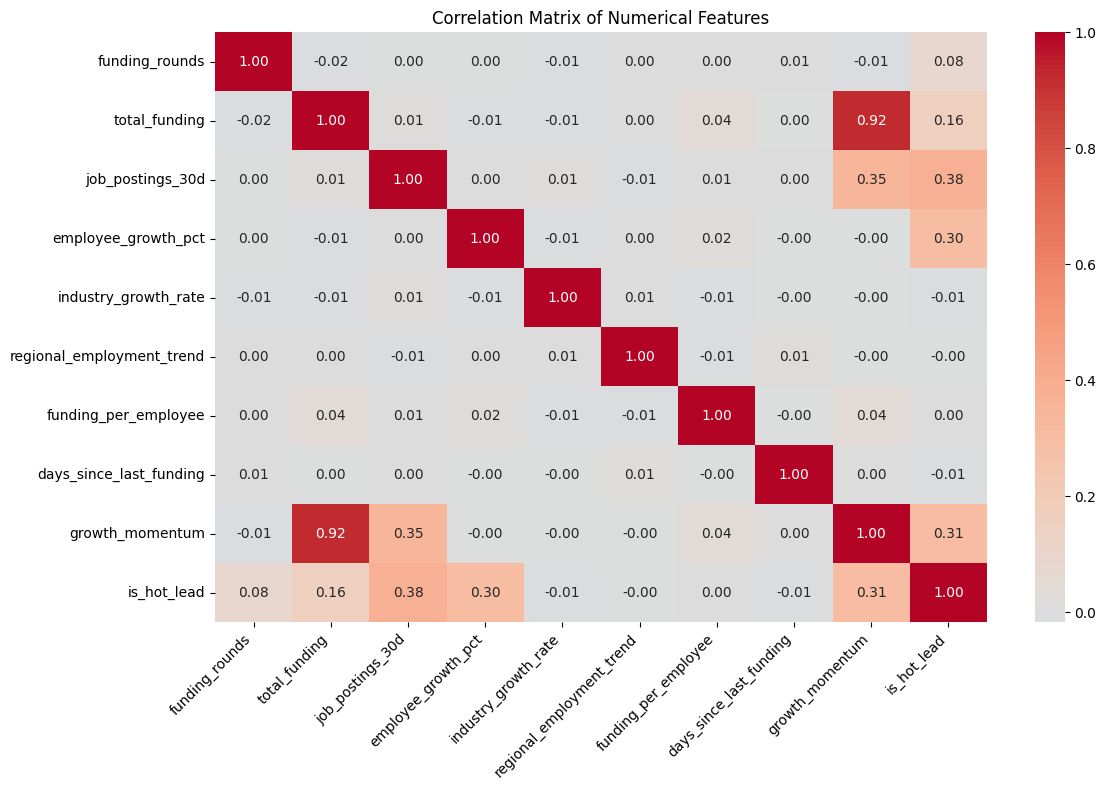

In [98]:
# Select numerical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_train[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
# Check for missing values and data types
print("Missing values in training data:")
print(df_train.isnull().sum())

print("\nData types in training data:")
print(df_train.dtypes)

# Select only numeric columns for correlation analysis
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_train[numeric_columns].corr()
corr_matrix



Missing values in training data:
company_id                   0
company_name                 0
industry                     0
funding_rounds               0
total_funding                0
last_funding_date            0
job_postings_30d             0
employee_growth_pct          0
hiring_roles                 0
industry_growth_rate         0
regional_employment_trend    0
funding_per_employee         0
days_since_last_funding      0
growth_momentum              0
is_hot_lead                  0
dtype: int64

Data types in training data:
company_id                           object
company_name                         object
industry                             object
funding_rounds                      float64
total_funding                       float64
last_funding_date            datetime64[ns]
job_postings_30d                    float64
employee_growth_pct                 float64
hiring_roles                         object
industry_growth_rate                float64
regional_employment

,funding_rounds,total_funding,job_postings_30d,employee_growth_pct,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
funding_rounds,1.000000,-0.017255,0.000871,0.001336,-0.007081,0.003896,0.004219,0.007470,-0.013887,0.082195
total_funding,-0.017255,1.000000,0.012481,-0.006847,-0.009645,0.003130,0.035622,0.000262,0.924852,0.161226
job_postings_30d,0.000871,0.012481,1.000000,0.004361,0.013541,-0.008118,0.007177,0.004419,0.346355,0.380092
employee_growth_pct,0.001336,-0.006847,0.004361,1.000000,-0.006599,0.003510,0.019338,-0.003357,-0.004245,0.301879
industry_growth_rate,-0.007081,-0.009645,0.013541,-0.006599,1.000000,0.005194,-0.008626,-0.002939,-0.004425,-0.009900
regional_employment_trend,0.003896,0.003130,-0.008118,0.003510,0.005194,1.000000,-0.007604,0.011807,-0.000574,-0.001105
funding_per_employee,0.004219,0.035622,0.007177,0.019338,-0.008626,-0.007604,1.000000,-0.002944,0.036669,0.003302
days_since_last_funding,0.007470,0.000262,0.004419,-0.003357,-0.002939,0.011807,-0.002944,1.000000,0.004533,-0.006525
growth_momentum,-0.013887,0.924852,0.346355,-0.004245,-0.004425,-0.000574,0.036669,0.004533,1.000000,0.311091
is_hot_lead,0.082195,0.161226,0.380092,0.301879,-0.009900,-0.001105,0.003302,-0.006525,0.311091,1.000000


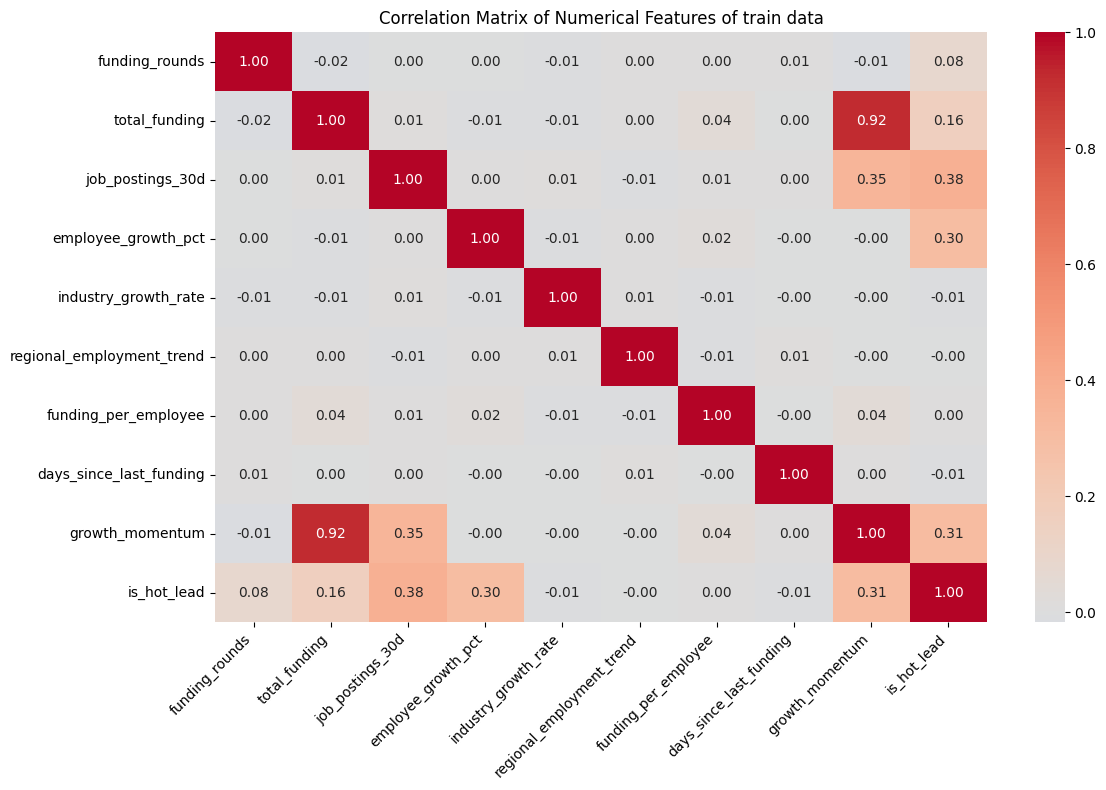

In [100]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features of train data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Correlation of features with 'is_hot_lead':


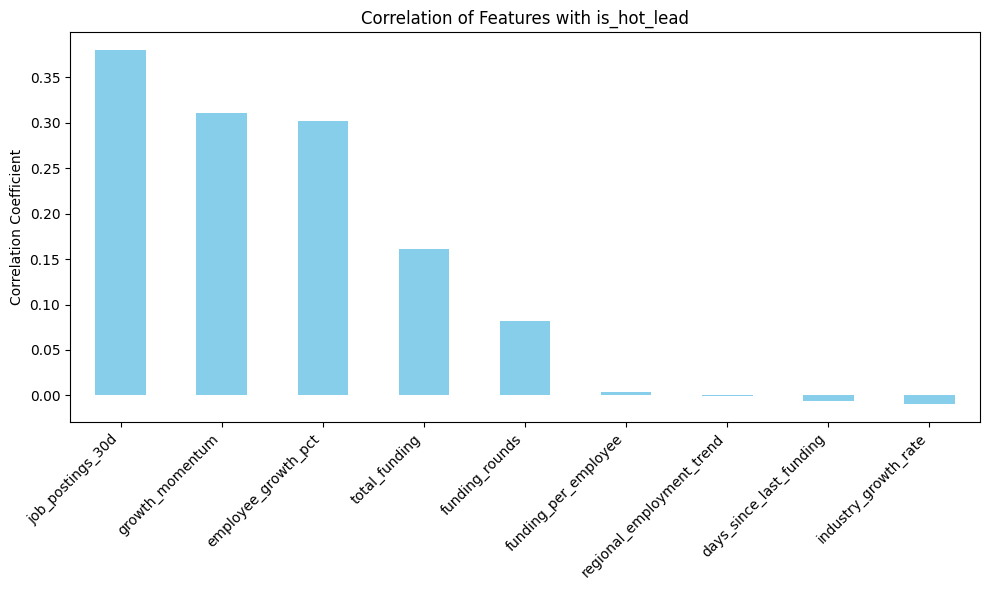

In [101]:
# Correlation analysis with the target variable
target_corr = corr_matrix['is_hot_lead'].sort_values(ascending=False)
print("\nCorrelation of features with 'is_hot_lead':")
target_corr

# Visualize correlations with the target variable
plt.figure(figsize=(10, 6))
target_corr.drop('is_hot_lead').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with is_hot_lead')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

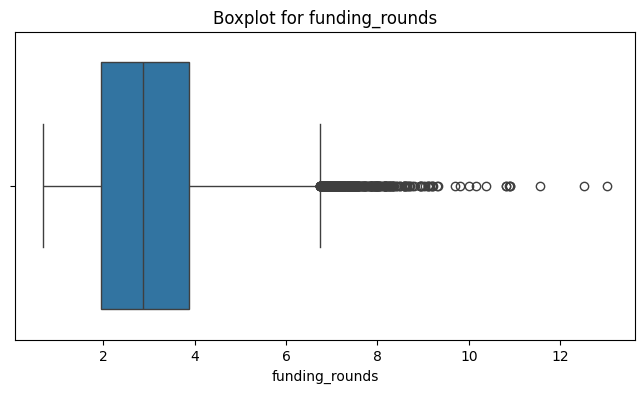

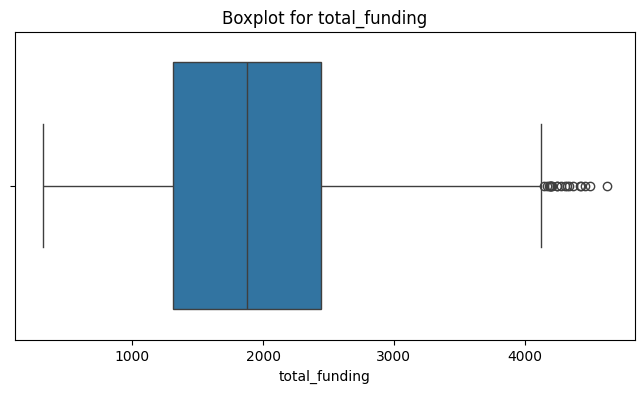

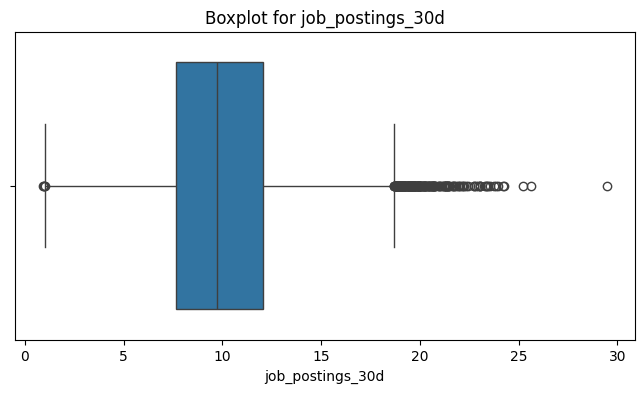

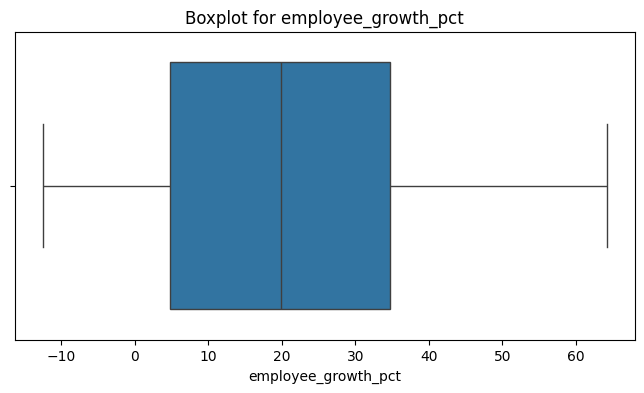

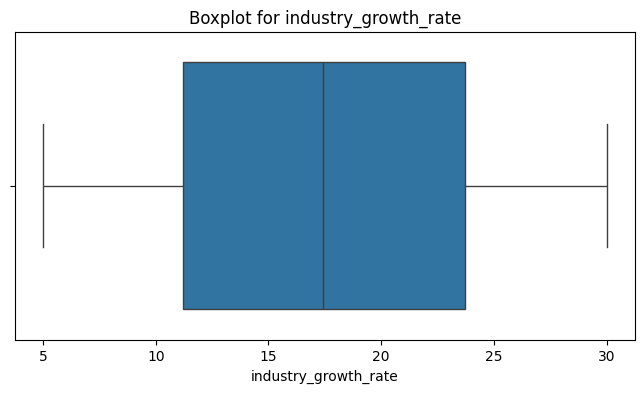

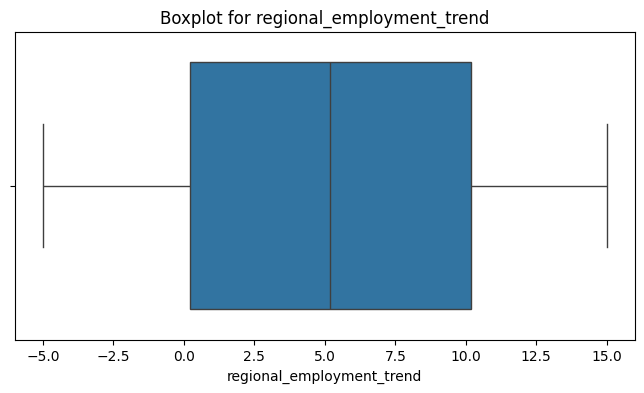

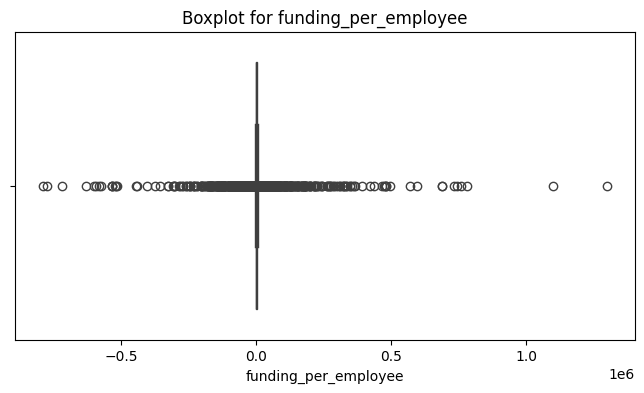

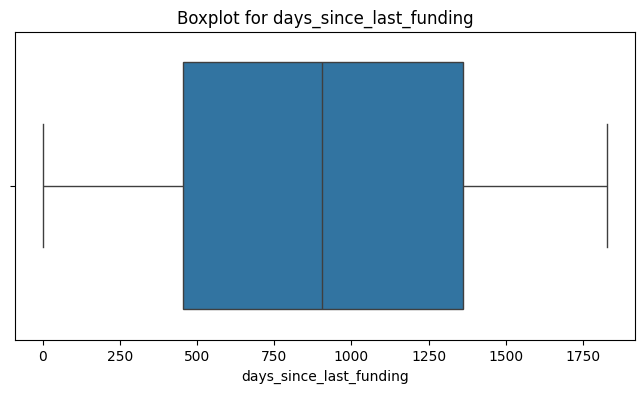

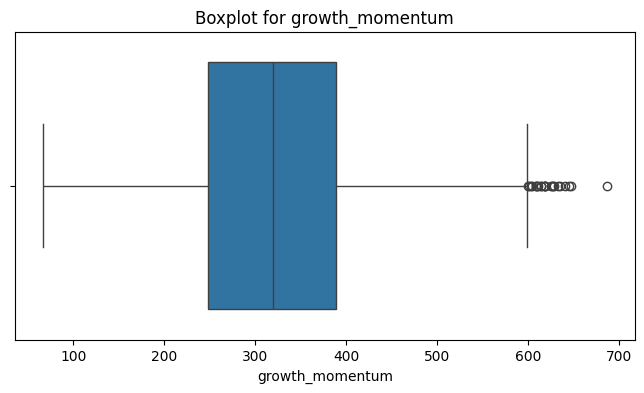

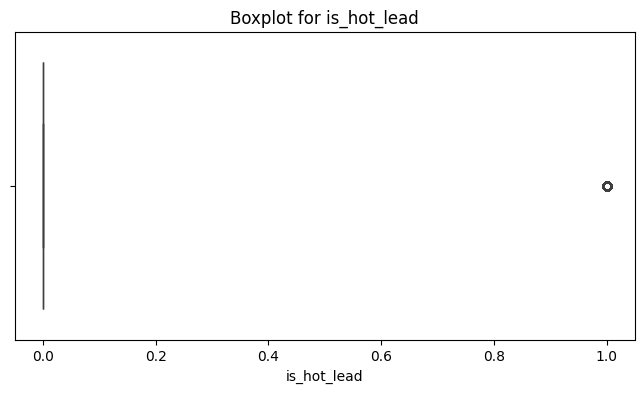

Outlier Summary:
{'funding_rounds': 330, 'total_funding': 20, 'job_postings_30d': 220, 'employee_growth_pct': 0, 'industry_growth_rate': 0, 'regional_employment_trend': 0, 'funding_per_employee': 4518, 'days_since_last_funding': 0, 'growth_momentum': 24, 'is_hot_lead': 2985}


In [102]:
# Function to detect outliers using IQR
def detect_outliers(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
# Select numeric columns for outlier detection
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

# Detect and visualize outliers for each numeric column
outlier_summary = {}
for column in numeric_columns:
    outliers = detect_outliers(df_train, column)
    outlier_summary[column] = len(outliers)
    
    # Visualize outliers using boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

print("Outlier Summary:")
print(outlier_summary)



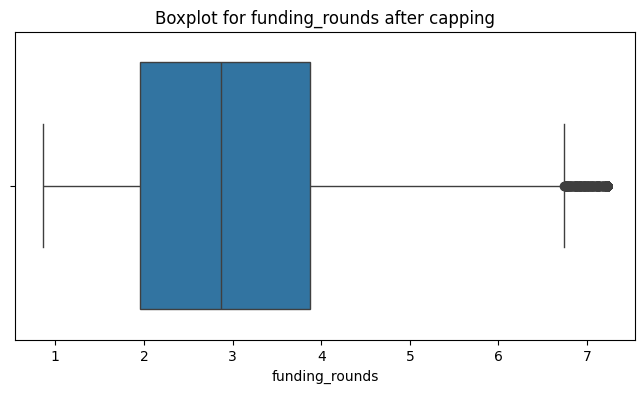

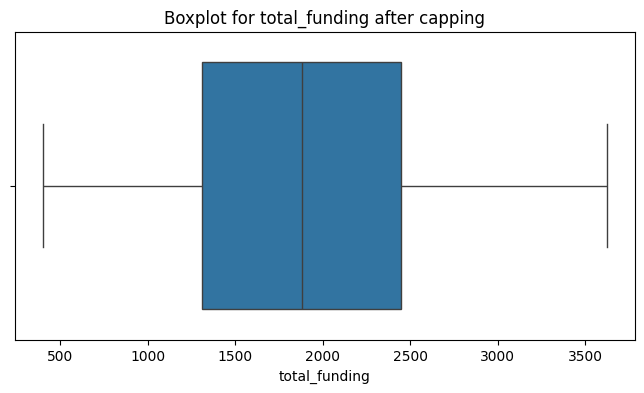

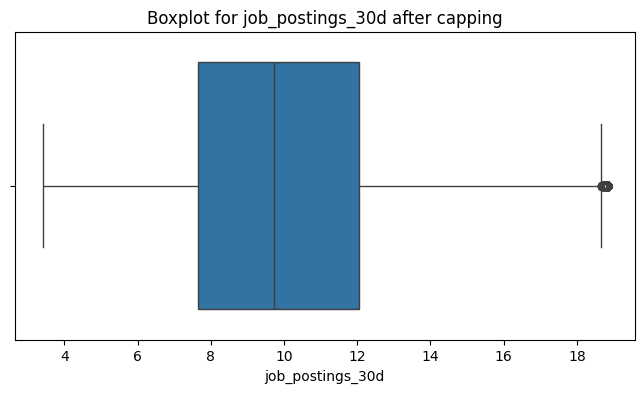

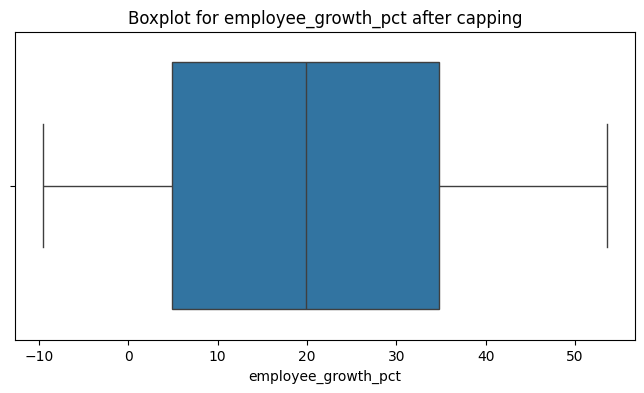

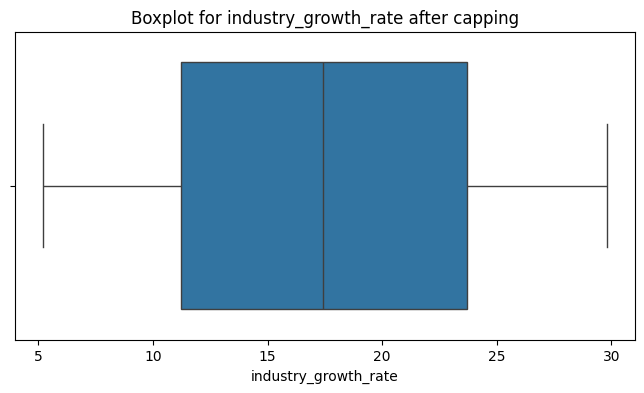

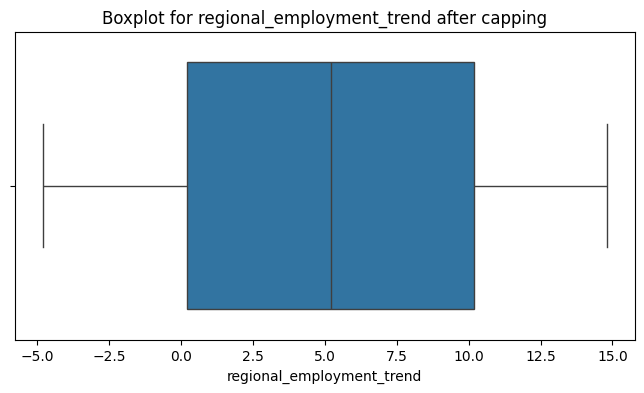

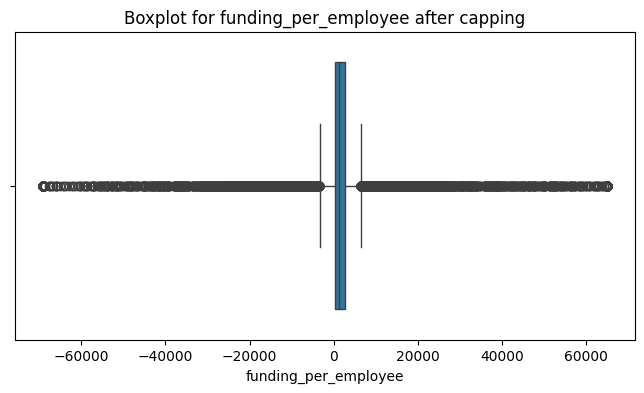

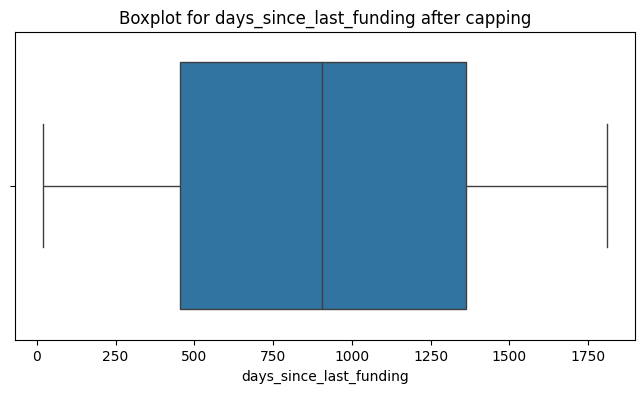

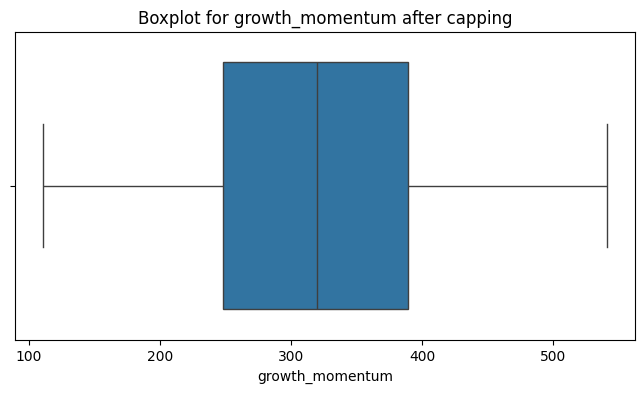

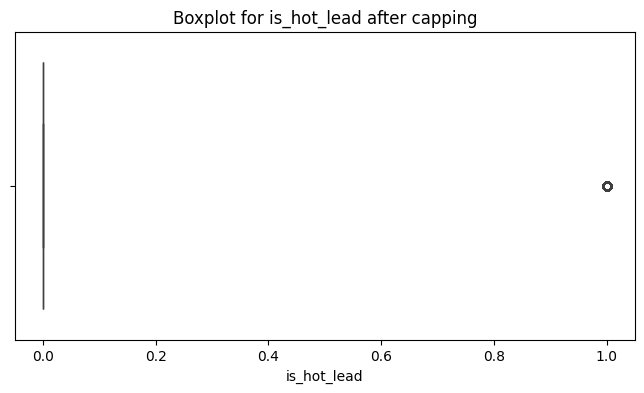

In [103]:
# Proceeding with further cleaning using winsorization to cap values at the 1st and 99th percentiles
# Create a copy of training data
df_train_clean =df_train.copy()

# Replace infinite values with NaN
df_train_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# For each numeric column, cap values at 1st and 99th percentiles
numeric_columns = df_train_clean.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    # Calculate 1st and 99th percentiles
    lower_cap = df_train_clean[column].quantile(0.01)
    upper_cap = df_train_clean[column].quantile(0.99)
    
    # Cap values
    df_train_clean[column] = np.where(df_train_clean[column] < lower_cap, lower_cap, df_train_clean[column])
    df_train_clean[column] = np.where(df_train_clean[column] > upper_cap, upper_cap, df_train_clean[column])

# Optional: Drop any remaining NaN values
df_train_clean.dropna(inplace=True)

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train_clean[column])
    plt.title('Boxplot for ' + column + ' after capping')
    plt.show()



In [104]:
# Now, scale numeric features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_clean[numeric_columns])
scaled_df_train = pd.DataFrame(scaled_features, columns=numeric_columns, index=df_train_clean.index)

# Replace the numeric columns in df_train_clean
df_train_clean.update(scaled_df_train)

print('Feature engineering completed: winsorization and scaling executed.')

Feature engineering completed: winsorization and scaling executed.


In [105]:

print('Cleaned and scaled training data head:')
df_train_clean.head()

Cleaned and scaled training data head:


,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_024008,Moreno and Sons,Retail,-0.751225,0.077381,2021-07-14,0.307209,-1.622139,Operations,-0.824065,-0.925474,-0.529708,0.772713,0.390267,-0.419279
1,COMP_007976,"Morales, Hubbard and Mcdonald",Healthcare,0.169647,0.675632,2020-05-23,-1.513313,0.036047,Marketing,0.891194,0.930887,0.069012,1.563884,0.075529,-0.419279
2,COMP_021959,Strickland-Wright,Tech,0.700565,-1.893081,2020-05-07,-1.526620,-1.117591,Operations,0.420881,-1.151013,0.014265,1.594241,-2.125368,-0.419279
3,COMP_012658,Sanders Group,Fintech,-0.096616,-1.233782,2023-04-11,-0.033586,-1.074867,Operations,0.794365,1.520759,0.227842,-0.433964,-1.215036,-0.419279
4,COMP_011887,Davis Inc,Retail,-0.503104,-0.069481,2024-03-27,0.450055,0.152312,Marketing,-1.169884,0.601253,0.028862,-1.099914,0.248280,2.385046


In [106]:
# Fixing the target variable by converting it back to binary (categorical)
df_train_clean['is_hot_lead'] = df_train_clean['is_hot_lead'].apply(lambda x: 1 if x > 0 else 0)

In [107]:
df_train_clean

,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_024008,Moreno and Sons,Retail,-0.751225,0.077381,2021-07-14,0.307209,-1.622139,Operations,-0.824065,-0.925474,-0.529708,0.772713,0.390267,0
1,COMP_007976,"Morales, Hubbard and Mcdonald",Healthcare,0.169647,0.675632,2020-05-23,-1.513313,0.036047,Marketing,0.891194,0.930887,0.069012,1.563884,0.075529,0
2,COMP_021959,Strickland-Wright,Tech,0.700565,-1.893081,2020-05-07,-1.526620,-1.117591,Operations,0.420881,-1.151013,0.014265,1.594241,-2.125368,0
3,COMP_012658,Sanders Group,Fintech,-0.096616,-1.233782,2023-04-11,-0.033586,-1.074867,Operations,0.794365,1.520759,0.227842,-0.433964,-1.215036,0
4,COMP_011887,Davis Inc,Retail,-0.503104,-0.069481,2024-03-27,0.450055,0.152312,Marketing,-1.169884,0.601253,0.028862,-1.099914,0.248280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,COMP_006046,Greer-Hansen,Retail,-0.410921,0.444619,2022-09-22,2.487110,-0.743919,Engineering,1.112518,0.098127,0.358310,-0.052609,1.042302,0
19996,COMP_024422,Martinez Inc,Healthcare,-0.549580,0.822024,2024-11-09,-1.780260,0.268994,Operations,1.112518,-1.550044,0.085877,-1.530599,-0.256323,0
19997,COMP_006482,Davis Inc,Tech,-1.349003,-0.301432,2024-05-24,-0.338563,-1.071622,Sales,1.555165,-0.526443,0.887199,-1.209956,-0.396493,0
19998,COMP_024460,Howell-Jacobs,Retail,-0.842356,-0.092491,2024-09-19,-0.965690,-1.066980,Marketing,1.651994,-1.584742,1.031346,-1.433837,-0.347526,0


In [108]:
df_test

,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_004135,Bullock Group,Retail,3.265246,2425223.28,2021-08-20,7.201083,5.569041,Operations,8.0,8.4,3566.504824,1280,1.697656e+07,0
1,COMP_011804,"Morris, Tyler and Scott",SaaS,1.912502,3988620.41,2020-05-28,14.562457,46.348625,Engineering,7.1,4.3,890.317056,1729,5.584069e+07,1
2,COMP_021637,Lara-Williams,Tech,5.425373,2645234.46,2021-03-04,14.797940,34.121940,Marketing,16.0,14.8,669.679610,1449,3.703328e+07,0
3,COMP_018533,Frost-Hernandez,Retail,0.987882,3194492.15,2022-10-25,14.946632,4.969312,Sales,21.1,5.9,5414.393475,849,4.152840e+07,0
4,COMP_014125,Williams-Bean,Retail,3.583654,884497.73,2020-11-01,9.714369,-7.111839,Operations,8.1,-4.3,-1499.148695,1572,9.729475e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,COMP_012325,Murray Inc,Fintech,3.447588,7273814.38,2021-12-26,20.262727,3.601031,Sales,9.6,-0.8,13988.104577,1152,1.454763e+08,0
4996,COMP_017779,Fernandez LLC,Tech,2.818313,3748213.74,2020-10-26,5.931160,45.109600,Marketing,6.2,-4.5,804.337712,1578,1.874107e+07,0
4997,COMP_008514,Salas Inc,SaaS,2.177181,8352240.36,2020-11-22,14.886280,35.110038,Marketing,25.4,10.9,2163.792839,1551,1.252836e+08,1
4998,COMP_020714,Brooks Inc,Healthcare,0.741923,8748941.69,2021-09-24,11.137551,46.251968,Operations,9.3,-2.1,1792.815920,1245,8.748942e+07,0


# MODEL BUILDING

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3373
           1       0.85      0.85      0.85       620

    accuracy                           0.95      3993
   macro avg       0.91      0.91      0.91      3993
weighted avg       0.95      0.95      0.95      3993



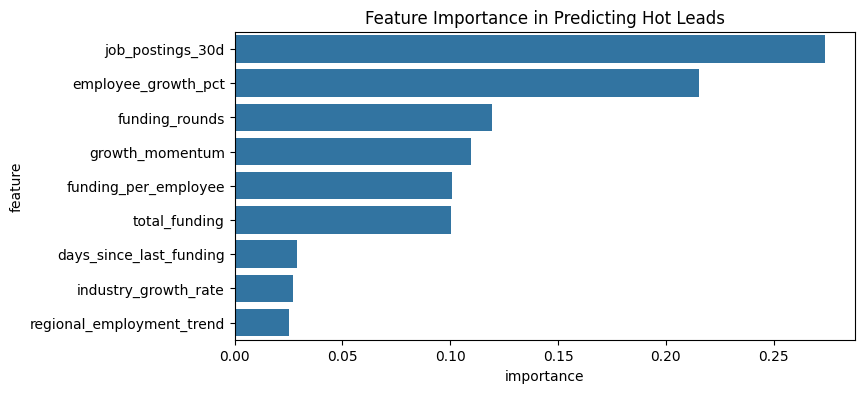

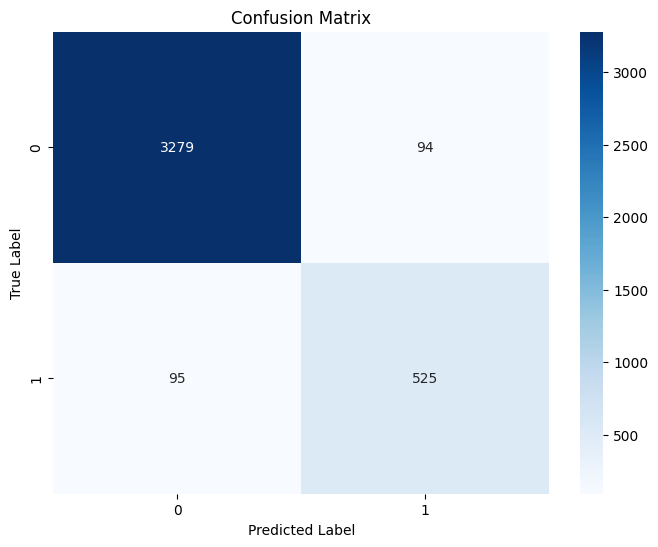

Cross-validation scores: [0.96068119 0.95542199 0.95442024 0.94866016 0.96043075]
Average CV score: 0.955922865013774
Standard deviation: 0.004432120572126995
Model training completed!


In [109]:
# Prepare features and target
X = df_train_clean.drop(['is_hot_lead', 'company_id', 'company_name', 'industry', 'last_funding_date', 'hiring_roles'], axis=1)
y = df_train_clean['is_hot_lead']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Hot Leads')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\
Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

print("\
Model training completed!")

Model Performance Metrics:
Average Accuracy (from CV): 0.9559 ± 0.0044


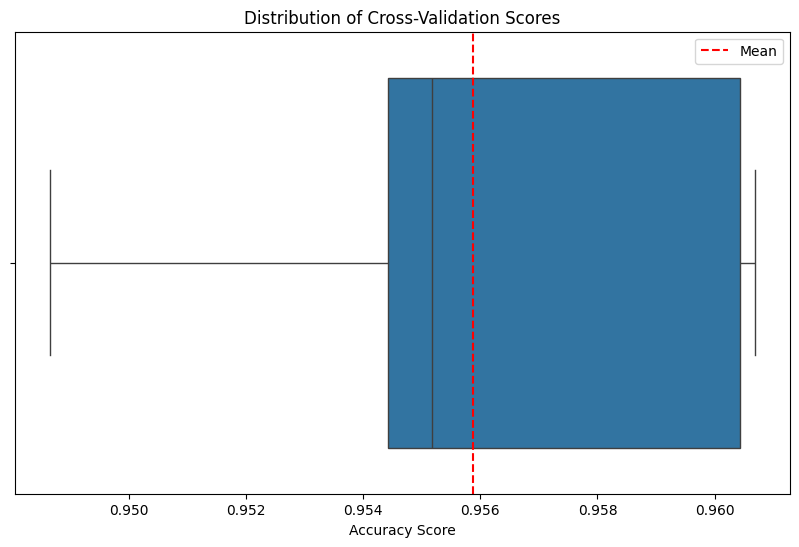

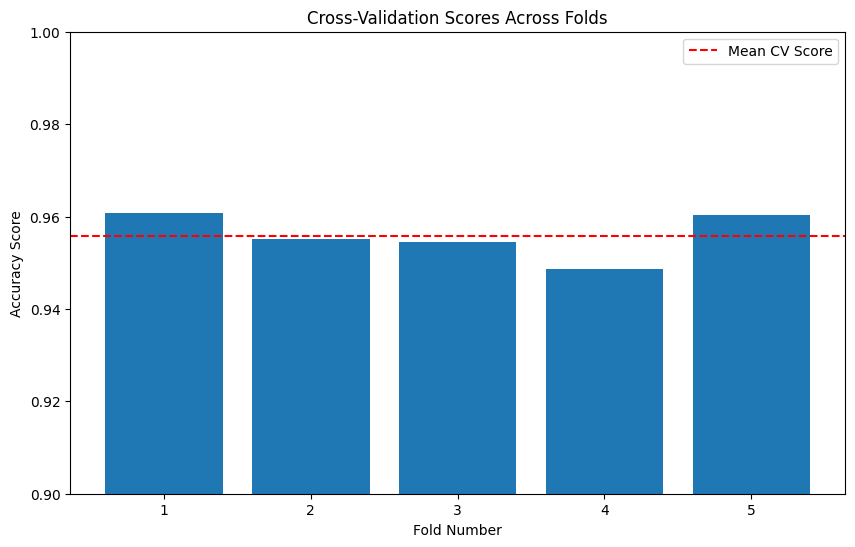

Performance Summary:
Minimum CV Score: 0.9487
Maximum CV Score: 0.9607
Score Range: 0.0120
Standard Deviation: 0.0044


In [110]:
# Our cross-validation scores showed:
cv_scores = np.array([0.96068119, 0.95517155, 0.95442024, 0.94866016, 0.96043075])

print("Model Performance Metrics:")
print(f"Average Accuracy (from CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_scores)
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy Score')
plt.axvline(cv_scores.mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

# Create a bar plot showing the individual fold performances
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label='Mean CV Score')
plt.title('Cross-Validation Scores Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.ylim(0.90, 1.0)  # Setting y-axis to focus on the relevant range
plt.legend()
plt.show()

print("\
Performance Summary:")
print(f"Minimum CV Score: {cv_scores.min():.4f}")
print(f"Maximum CV Score: {cv_scores.max():.4f}")
print(f"Score Range: {cv_scores.max() - cv_scores.min():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# PREDICTION

In [146]:
df_pred= pd.read_csv("C://Users//KRISHNA KANTH//Desktop//abex project//dataset (1)//holdout.csv")

In [147]:
# Proceeding with further cleaning using winsorization to cap values at the 1st and 99th percentiles
# Create a copy of training data
df_test_clean =df_pred.copy()

# Replace infinite values with NaN
df_test_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# For each numeric column, cap values at 1st and 99th percentiles
numeric_columns = df_test_clean.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    # Calculate 1st and 99th percentiles
    lower_cap = df_test_clean[column].quantile(0.01)
    upper_cap = df_test_clean[column].quantile(0.99)
# Optional: Drop any remaining NaN values
df_test_clean.dropna(inplace=True)


In [150]:
df_train_clean['total_funding'] = np.sqrt(df_train['total_funding'])  # Square root
df_train_clean['growth_momentum'] = np.cbrt(df_train['growth_momentum'])  # Cube root
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_test_clean[numeric_columns])
scaled_df_test = pd.DataFrame(scaled_features, columns=numeric_columns, index=df_test_clean.index)
# Replace the numeric columns in df_train_clean
df_test_clean.update(scaled_df_test)
print('Feature engineering completed: winsorization and scaling executed.')

Feature engineering completed: winsorization and scaling executed.


In [151]:
df_train_clean.head(3)

,company_id,company_name,industry,funding_rounds,total_funding,last_funding_date,job_postings_30d,employee_growth_pct,hiring_roles,industry_growth_rate,regional_employment_trend,funding_per_employee,days_since_last_funding,growth_momentum,is_hot_lead
0,COMP_024008,Moreno and Sons,Retail,-0.751225,44.138749,2021-07-14,0.307209,-1.622139,Operations,-0.824065,-0.925474,-0.529708,0.772713,7.094800,0
1,COMP_007976,"Morales, Hubbard and Mcdonald",Healthcare,0.169647,49.058108,2020-05-23,-1.513313,0.036047,Marketing,0.891194,0.930887,0.069012,1.563884,6.884752,0
2,COMP_021959,Strickland-Wright,Tech,0.700565,20.932457,2020-05-07,-1.526620,-1.117591,Operations,0.420881,-1.151013,0.014265,1.594241,4.620559,0


In [144]:
# Ensure the test dataset has the same features as the training dataset
X_test_final = df_test_clean.drop(columns=['company_id', 'company_name', 'industry', 'last_funding_date', 'hiring_roles'], errors='ignore')

# Apply the same scaler used for training data
X_test_final_scaled = scaler.transform(X_test_final)

# Predict probabilities (probability of being a hot lead)
test_probabilities = rf_model.predict_proba(X_test_final_scaled)[:, 1]

# Convert probabilities to binary predictions (threshold = 0.5)
test_predictions = (test_probabilities >= 0.5).astype(int)

# Save the predictions in a CSV file
output_df = pd.DataFrame({'company_id': df_test_clean['company_id'], 'is_hot_lead': test_predictions})
output_df.to_csv('predictions.csv', index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
